In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import anndata

from itertools import permutations
import sklearn.metrics


plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text

# my code
%load_ext autoreload
%autoreload 2
from passenger.plot.plot import *


A_patients = ["A"+str(i) for i in np.arange(1,16)]
P_patients = ["P1", "P2", "P3", "P4"]
LUNG_patients = ["p018", "p019", "p023", "p030", "p031", "p032", "p033"]
CRC_patients = ["p007", "p013", "p014", "p016", "p020", "p026"]

all_patients = np.concatenate([P_patients, A_patients, LUNG_patients, CRC_patients])

/home/vmarotl/anaconda3/envs/passenger/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("../../../raw_data/n_reads_per_patient.csv", index_col=0)


In [3]:

"""
for A in P_patients:
    data = pd.read_csv("../../../raw_data/"+A+"/reads_per_barcode.txt", sep="\s", header=None, index_col=None)
    df.loc[A]["n_reads"]=int(np.mean(data[0]))
    adata = adata = anndata.read_h5ad("../../../runs/k2_"+A+"_False_2.h5ad")
    df.loc[A]["n_vars"]=adata.shape[1]

for A in A_patients:
    data = pd.read_csv("../../../raw_data/"+A+"/reads_per_barcode.txt", sep="\s", header=None, index_col=1)
    adata = anndata.read_h5ad("../../../runs/k2_"+A+"_False_2.h5ad")
    cells = adata.obs.index.str.split("-").str[0]
    data = data.loc[cells]
    df.loc[A]["n_reads"]=int(np.mean(data[0]))
    df.loc[A]["n_vars"]=adata.shape[1]
    
for A in LUNG_patients:
    data = pd.read_csv("../../../raw_data/"+A+"/reads_per_barcode.txt", sep="\s", header=None, index_col=1)
    adata = anndata.read_h5ad("../../../runs/k2_"+A+"_False_2.h5ad")
    cells = adata.obs.index.str.split("-").str[0]
    data = data.loc[cells]
    df.loc[A]["n_reads"]=int(np.mean(data[0]))
    df.loc[A]["n_vars"]=adata.shape[1]
    
for A in CRC_patients:
    data = pd.read_csv("../../../raw_data/"+A+"/reads_per_barcode.txt", sep="\s", header=None, index_col=1)
    adata = anndata.read_h5ad("../../../runs/k2_"+A+"_False_2.h5ad")
    cells = adata.obs.index.str.split("-").str[0]
    data = data.loc[cells]
    df.loc[A]["n_reads"]=int(np.mean(data[0]))
    df.loc[A]["n_vars"]=adata.shape[1]

df.to_csv("../../../raw_data/n_reads_per_patient.csv")
"""

'\nfor A in P_patients:\n    data = pd.read_csv("../../../raw_data/"+A+"/reads_per_barcode.txt", sep="\\s", header=None, index_col=None)\n    df.loc[A]["n_reads"]=int(np.mean(data[0]))\n    adata = adata = anndata.read_h5ad("../../../runs/k2_"+A+"_False_2.h5ad")\n    df.loc[A]["n_vars"]=adata.shape[1]\n\nfor A in A_patients:\n    data = pd.read_csv("../../../raw_data/"+A+"/reads_per_barcode.txt", sep="\\s", header=None, index_col=1)\n    adata = anndata.read_h5ad("../../../runs/k2_"+A+"_False_2.h5ad")\n    cells = adata.obs.index.str.split("-").str[0]\n    data = data.loc[cells]\n    df.loc[A]["n_reads"]=int(np.mean(data[0]))\n    df.loc[A]["n_vars"]=adata.shape[1]\n    \nfor A in LUNG_patients:\n    data = pd.read_csv("../../../raw_data/"+A+"/reads_per_barcode.txt", sep="\\s", header=None, index_col=1)\n    adata = anndata.read_h5ad("../../../runs/k2_"+A+"_False_2.h5ad")\n    cells = adata.obs.index.str.split("-").str[0]\n    data = data.loc[cells]\n    df.loc[A]["n_reads"]=int(np.mea

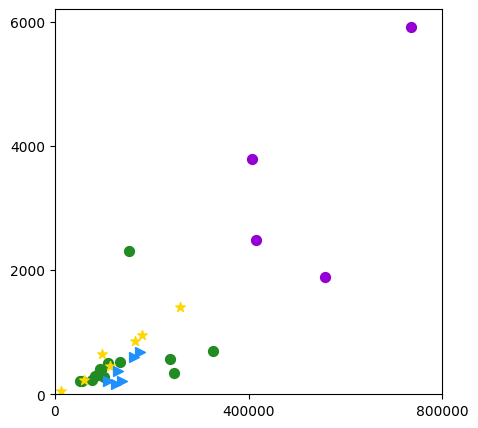

In [4]:
fig, ax = plt.subplots(1,1, figsize=(5, 5))

sub_df = df.loc[df.index.str[0]=="P"]
plt.scatter((sub_df["n_reads"]).tolist(), sub_df["n_vars"].tolist(), marker="o", s=50, c="darkviolet")
#for i, lab in enumerate(sub_df.index):
#    ax.annotate(lab, (sub_df["n_reads"].iloc[i], sub_df.n_vars.iloc[i]))

sub_df = df.loc[A_patients]
plt.scatter(sub_df["n_reads"], sub_df["n_vars"].tolist(), marker="o", s=50, c="forestgreen")
#for i, lab in enumerate(sub_df.index):
#    ax.annotate(lab, (sub_df["n_reads"][i], sub_df.n_vars.iloc[i]))  
    
sub_df = df.loc[LUNG_patients]
plt.scatter(sub_df["n_reads"], sub_df["n_vars"].tolist(), marker="*", s=50, c="gold")
#for i, lab in enumerate(LUNG_patients):
#    ax.annotate(lab, (sub_df["n_reads"][i], sub_df.n_vars.iloc[i])) 
    
sub_df = df.loc[CRC_patients]
plt.scatter(sub_df["n_reads"], sub_df["n_vars"].tolist(), marker=">", s=50, c="dodgerblue")
#for i, lab in enumerate(CRC_patients):
#    ax.annotate(lab, (sub_df["n_reads"][i], sub_df.n_vars.iloc[i])) 
ax.set_xticks([0, 400000, 800000])#, ["0", "2e5", "4e5", "6e5", "8e5"])
ax.set_yticks([0, 2000, 4000, 6000])#, ["0", "1e4", "2e4", "3e4"])

plt.xlim(0,800000)
plt.ylim(0)


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.savefig("../figures/Fig4_reads-per-cell-vs-vars.pdf", bbox_inches='tight', format='pdf', dpi=300)
plt.show()


In [6]:
subsets = np.array([1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05])

f1score = []
n_vars = []
sub_patients = []
for patient in all_patients:
    print(patient)
    prefix = "AML_MutaSeq" if patient[0]=="P" else "AML_10X" if patient[0]=="A" else "LUNG" if patient in LUNG_patients else "CRC"
    adata = anndata.read_h5ad("../processed_data/"+prefix+"/"+patient+".h5ad")
    
    if "cell_labels" not in adata.obs.columns:
        continue
    
    sub_cells = adata.obs_names[adata.obs["cell_labels"]!="undetermined"]
    adata = adata[sub_cells]
    cancer_factors = np.where(adata.uns['factor_labels']=="cancer")[0]
    ref_labels = [i in cancer_factors for i in  np.argmax(adata.obsm["C"], axis=1)]
    
    f1, rec, n_v = [], [], []
    try:
        for i in subsets:
            f,nv = [], []


            for j in range(5):
                subset_data = anndata.read_h5ad("../processed_data/subsampled//"+patient+"_"+str(i.astype(int) if i == 1 else i)+"_"+str(j+1)+".h5ad")[sub_cells]

                C = subset_data.obsm["C"]
                perm = list(permutations(np.arange(0, C.shape[1])))
                dists = [np.sum(np.abs((adata.obsm["C"]-C[:,perm[i]]))) for i in range(len(perm))]
                aligned = C[:,perm[np.argmin(dists)]]
                new_labels = [i in cancer_factors for i in np.argmax(aligned, axis=1)]
                f.append(sklearn.metrics.f1_score(ref_labels, new_labels))
                nv.append(subset_data.shape[1])
            f1.append(f)
            n_v.append(nv)
        f1score.append(f1)
        n_vars.append(n_v)
    except:
        print(patient, i, j)
        continue
              
    sub_patients.append(patient)
f1score=np.array(f1score)
n_vars = np.array(n_vars)

P1
P2
P3
P4
A1
A2
A3
A4
A5
A6
A7
A8
A9
A10
A11
A12
A13
A14
A15
p018
p019
p023
p030
p031
p032
p033
p007
p013
p014
p016
p020
p026


In [7]:
mean_f1 = np.mean(f1score, axis=2)
std_f1 = np.std(f1score, axis=2)

mean_n_vars = np.mean(n_vars, axis=2)
std_n_vars = np.std(n_vars, axis=2)

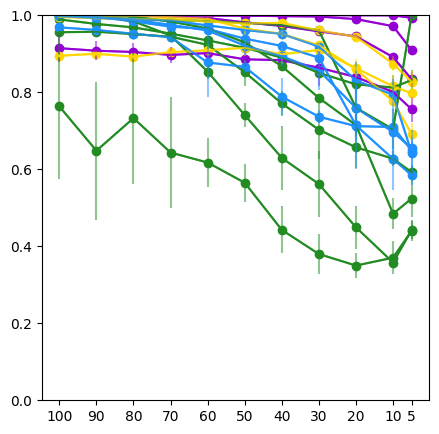

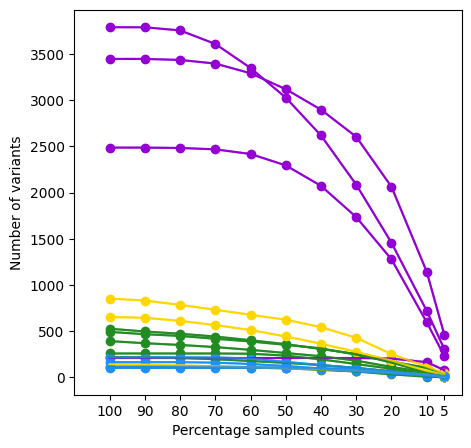

In [8]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

x = (1-subsets)

for i, patient in enumerate(sub_patients):
    color = "darkviolet" if patient in P_patients else "forestgreen" if patient in A_patients else "gold" if patient in LUNG_patients else "dodgerblue"

    y, e = mean_f1[i], std_f1[i]
    
    # ax.annotate(patient, (x[colors_sub][-1], y[colors_sub][-1]))  
    ax.scatter(x, y, color=color)
    ax.errorbar(x,y, e,color=color, alpha=.5)
    ax.plot(x,y, color=color)
    
plt.ylim(0, 1)
plt.xticks(1-subsets, [str(i) for i in np.round((subsets)*100).astype(int)])
plt.savefig("../figures/Fig4_QC-F1.pdf", bbox_inches='tight', format='pdf', dpi=300)
plt.show()

fig, ax = plt.subplots(1,1,figsize=(5,5))

for i, patient in enumerate(sub_patients):
    color = "darkviolet" if patient in P_patients else "forestgreen" if patient in A_patients else "gold" if patient in LUNG_patients else "dodgerblue"
            
    y, e = mean_n_vars[i], std_n_vars[i]
    #ax.annotate(patient, (x[0], y[0]))#[colors_sub][-1], y[colors_sub][-1]))  
    ax.scatter(x, y, color=color)
    ax.errorbar(x,y, e,color=color, alpha=.5)
    ax.plot(x,y, color=color)
    
ax.set_ylabel("Number of variants")
ax.set_xlabel("Percentage sampled counts")
ax.set_xticks(1-subsets, [str(i) for i in np.round((subsets)*100).astype(int)])
ax.set_xlim(-0.1, 1)
    
plt.xticks(1-subsets, [str(i) for i in np.round((subsets)*100).astype(int)])
plt.savefig("../figures/Fig4_QC-nvars.pdf", bbox_inches='tight', format='pdf', dpi=300)
plt.show()

# Robustness analysis

In [9]:
subsets = np.array([0, 10, 20, 30, 40, 50, 80, 100, 200, 500])#, 1000])

C_std_all, C_mean_all = [], []
C_std_std_all, C_mean_std_all = [], []
runtime_all = []
shape_all = []
f1_all = []
sub_patient = []
for patient in all_patients:
    print(patient)
    prefix = "AML_MutaSeq" if patient[0]=="P" else "AML_10X" if patient[0]=="A" else "LUNG" if patient in LUNG_patients else "CRC"
    refadata = anndata.read_h5ad("../processed_data/"+prefix+"/"+patient+".h5ad")
    
    if "cell_labels" not in refadata.obs.columns:
        continue
    
    cancer_factors = np.where(refadata.uns['factor_labels']=="cancer")[0]
    ref_labels = [i in cancer_factors for i in  np.argmax(refadata.obsm["C"], axis=1)]
    
    C_mean = []
    runtime = []
    f1 = []
    for n_cycles in subsets:
        C_all = []
        runti = []
        
        adata = anndata.read_h5ad("../processed_data/robustness/"+patient +"_"+ str(n_cycles)+".h5ad")

        C_all = adata.uns["all_C"]
        if (C_all.shape[0]!=200):
            C_mean.append(np.nan)
            runtime.append(np.nan)
            f1.append(np.nan)
            continue
        d = np.mean(np.var(C_all, axis=0))
        C_mean.append(d)

        C = adata.obsm["C"]

        perm = list(permutations(np.arange(0, C.shape[1])))
        dists = [np.sum(np.abs((refadata.obsm["C"]-C[:,perm[i]]))) for i in range(len(perm))]
        idx = perm[np.argmin(dists)]
        aligned_C = C[:,idx]
        new_labels = [i in cancer_factors for i in np.argmax(aligned_C, axis=1)]    
        f1.append(sklearn.metrics.f1_score(ref_labels, new_labels))


        runtime.append(adata.uns["run_time"]/4)
        
    f1_all.append(f1)
    C_mean_all.append(C_mean)
    runtime_all.append(runtime)
    shape_all.append(adata.shape[0]*adata.shape[1])
    sub_patient.append(patient)

C_mean_all = np.array(C_mean_all)
runtime_all = np.array(runtime_all)

P1
P2
P3
P4
A1
A2
A3
A4
A5
A6
A7
A8
A9
A10
A11
A12
A13
A14
A15
p018
p019
p023
p030
p031
p032
p033
p007
p013
p014
p016
p020
p026


### plot variance as a function of the number of EM: iterations

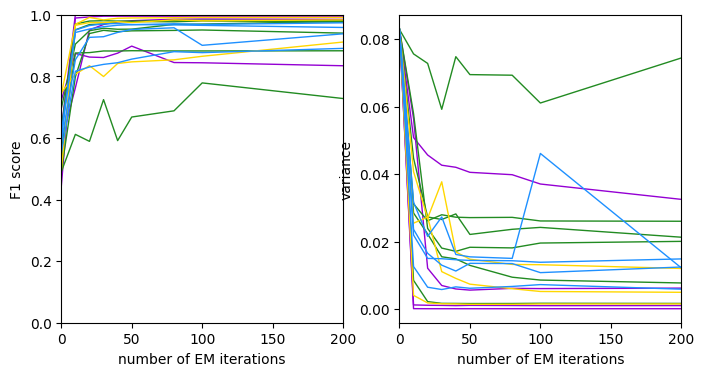

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for i, patient in enumerate(sub_patient):
    color = "darkviolet" if patient in P_patients else "forestgreen" if patient in A_patients else "gold" if patient in LUNG_patients else "dodgerblue"

    axs[0].plot(subsets, f1_all[i], color=color, linewidth=1)
    axs[1].plot(subsets, C_mean_all[i], color=color, linewidth=1)
    

axs[1].set_ylabel("variance")
axs[0].set_ylabel("F1 score")
axs[0].set_xlabel("number of EM iterations")
axs[1].set_xlabel("number of EM iterations")

axs[0].set_xlim(0, 200)
axs[1].set_xlim(0, 200)
axs[0].set_ylim(0, 1)
plt.savefig("../figures/S20_perform-EM-iterations.pdf", bbox_inches='tight', format='pdf', dpi=300)


### runtime plots:

(1) wNMF as a function of the number of EM iterations

(2) wNMF as a function of the size of the input

(3) variant calling as a function of the number of reads

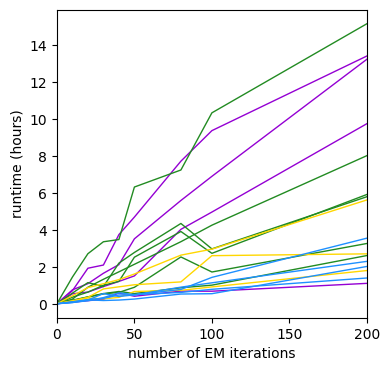

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(4, 4))

for i, patient in enumerate(sub_patient):
    color = "darkviolet" if patient in P_patients else "forestgreen" if patient in A_patients else "gold" if patient in LUNG_patients else "dodgerblue"
    plt.plot(subsets, runtime_all[i]/3600, color=color, linewidth=1)
plt.ylabel("runtime (hours)")
plt.xlabel("number of EM iterations")
plt.xlim(0, 200)
plt.savefig("../figures/S18_runtime-EM-iterations.pdf", bbox_inches='tight', format='pdf', dpi=300)


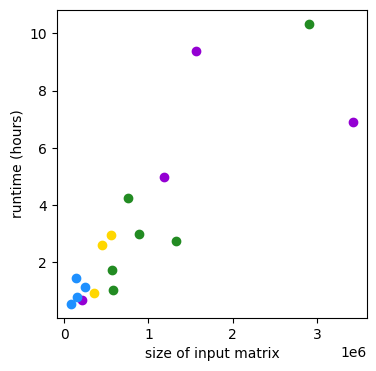

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(4, 4))

for i, patient in enumerate(sub_patient):
    color = "darkviolet" if patient in P_patients else "forestgreen" if patient in A_patients else "gold" if patient in LUNG_patients else "dodgerblue"
    plt.scatter(shape_all[i], runtime_all[i][7]/3600, color=color, linewidth=1)
    
plt.ylabel("runtime (hours)")
plt.xlabel("size of input matrix")
plt.savefig("../figures/S18_runtime-input-size.pdf", bbox_inches='tight', format='pdf', dpi=300)
plt.show()

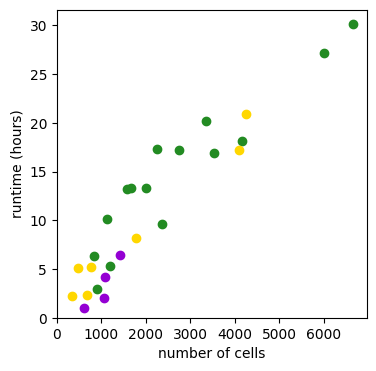

In [20]:
import os
def is_non_zero_file(fpath):
    return os.path.isfile(fpath) and os.path.getsize(fpath) > 0
                             
fig, ax = plt.subplots(1,1, figsize=(4, 4))

for patient in all_patients:
    
    color = "darkviolet" if patient in P_patients else "forestgreen" if patient in A_patients else "gold" if patient in LUNG_patients else "dodgerblue"
    file = "/home/vmarotl//fast/mutaseq/raw_data/"+patient+"/chr1/runtime.txt"
    x = anndata.read_h5ad("/home/vmarotl/fast/mutaseq/raw_data/"+patient+"/adata.h5ad").shape[0]
    if is_non_zero_file(file):
        f = pd.read_csv(file, delim_whitespace=True, header=None)
        y = f[1].iloc[0]/3600
    
        ax.scatter(x, y, color=color)
    
plt.ylabel("runtime (hours)")
plt.xlabel("number of cells")

plt.ylim(0)
plt.xlim(0)

plt.savefig("../figures/S18_runtime-var-call.pdf", bbox_inches='tight', format='pdf', dpi=300)
plt.show()

### robustness of bootstrap

In [21]:
f1score = []
Cdist = []
sub_patients = []
bootstraps = [1,2, 3, 4, 5, 10, 20, 30, 40, 50,60, 70, 80, 90, 100]

for patient in all_patients:
    print(patient)
    prefix = "AML_MutaSeq" if patient[0]=="P" else "AML_10X" if patient[0]=="A" else "LUNG" if patient in LUNG_patients else "CRC"
    adata = anndata.read_h5ad("../processed_data/"+prefix+"/"+patient+".h5ad")
    
    if "cell_labels" not in adata.obs.columns:
        continue
    
    sub_cells = adata.obs_names[adata.obs["cell_labels"]!="undetermined"]
    #adata = adata[sub_cells]
    cancer_factors = np.where(adata.uns['factor_labels']=="cancer")[0]
    ref_labels = [i in cancer_factors for i in  np.argmax(adata.obsm["C"], axis=1)]
    
    
    try:
        
        subset_data = anndata.read_h5ad("../processed_data/robustness/"+patient +"_100.h5ad")#[sub_cells]
        C = subset_data.obsm["C"]
        
        perm = list(permutations(np.arange(0, C.shape[1])))
        dists = [np.sum(np.abs((adata.obsm["C"]-C[:,perm[i]]))) for i in range(len(perm))]
        idx = perm[np.argmin(dists)]
        
        C_all = subset_data.uns["all_C"]
        aligned = C_all[:,:,idx]
        aligned_C = C[:,idx]
        f1, c = [], []
        for i in bootstraps:
            f_b, c_b = [], []
            for j in range(50):
                    a = np.random.choice(np.arange(0, 200), i, replace=False)

                    C_new = np.nanmean(aligned[a], axis=0)
                    
                    new_labels = [i in cancer_factors for i in np.argmax(C_new, axis=1)]
                    
                    f1_score = sklearn.metrics.f1_score(ref_labels,
                                                        new_labels)
                    f_b.append(f1_score)
                    c_b.append(np.mean((aligned_C-C_new)**2))

            f1.append(np.mean(f_b))
            c.append(np.mean(c_b))
        f1score.append(f1)
        Cdist.append(c)

    except:
        print(patient, i, j)
        continue
    #break
    sub_patients.append(patient)
f1score=np.array(f1score)

P1
P2
P3
P4
A1
A2
A3
A4
A5
A6
A7
A8
A9
A10
A11
A12
A13
A14
A15
p018
p019
p023
p030
p031
p032
p033
p007
p013
p014
p016
p020
p026


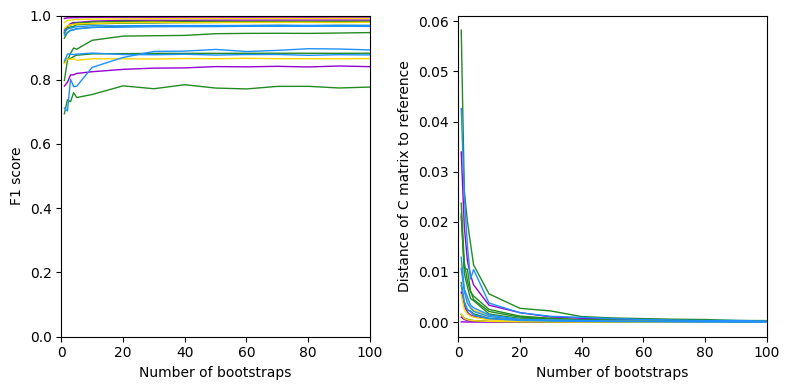

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for i, patient in enumerate(sub_patients):
    color = "darkviolet" if patient in P_patients else "forestgreen" if patient in A_patients else "gold" if patient in LUNG_patients else "dodgerblue"
    axs[0].plot(bootstraps, f1score[i],
             color=color, linewidth=1)
    axs[1].plot(bootstraps, Cdist[i],
             color=color, linewidth=1)
    #break
axs[0].set_xlim(0, 100)
axs[0].set_ylim(0, 1)
axs[0].set_ylabel("F1 score")
axs[0].set_xlabel("Number of bootstraps")
axs[1].set_xlim(0, 100)
axs[1].set_ylabel("Distance of C matrix to reference")
axs[1].set_xlabel("Number of bootstraps")
plt.tight_layout()
fig.savefig("../figures/S20_bootstrap.pdf")